# Efektiivsete interaktsioonikonstantide analüüs

In [57]:
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'

import numpy as np

from sympy import *
from sympy.interactive import printing
printing.init_printing(use_latex=true)

In [2]:
mu11, mu22, mu12, nu11, nu22, nu12, P, etaTilde = symbols(
    'mu11 mu22 mu12 nu11 nu22 nu12 P etatilde')

In [3]:
display(1 + etaTilde * mu11 - etaTilde**2 * mu12**2 + etaTilde * mu22 +
        etaTilde**2 * mu11 * mu22)
display(-mu11 + etaTilde * mu12**2 - etaTilde * mu11 * mu22 - nu11 -
        etaTilde * mu11 * nu11 + etaTilde**2 * mu12**2 * nu11 -
        etaTilde * mu22 * nu11 - etaTilde**2 * mu11 * mu22 * nu11)
display(-mu22 + etaTilde * mu12**2 - etaTilde * mu11 * mu22 - nu22 -
        etaTilde * mu11 * nu22 + etaTilde**2 * mu12**2 * nu22 -
        etaTilde * mu22 * nu22 - etaTilde**2 * mu11 * mu22 * nu22)
display(-mu12 - nu12 - etaTilde * mu11 * nu12 + etaTilde**2 * mu12**2 * nu12 -
        etaTilde * mu22 * nu12 - etaTilde**2 * mu11 * mu22 * nu12)

In [4]:
def Phi(mu11, mu22, mu12, etaTilde):
    return (1 + etaTilde * mu11 - etaTilde**2 * mu12**2 + etaTilde * mu22 +
            etaTilde**2 * mu11 * mu22)


def Theta11(mu11, mu22, mu12, nu11, etaTilde):
    return (-mu11 + etaTilde * mu12**2 - etaTilde * mu11 * mu22 - nu11 -
            etaTilde * mu11 * nu11 + etaTilde**2 * mu12**2 * nu11 -
            etaTilde * mu22 * nu11 - etaTilde**2 * mu11 * mu22 * nu11)


def Theta22(mu11, mu22, mu12, nu22, etaTilde):
    return (-mu22 + etaTilde * mu12**2 - etaTilde * mu11 * mu22 - nu22 -
            etaTilde * mu11 * nu22 + etaTilde**2 * mu12**2 * nu22 -
            etaTilde * mu22 * nu22 - etaTilde**2 * mu11 * mu22 * nu22)


def Theta12(mu11, mu22, mu12, nu12, etaTilde):
    return (-mu12 - nu12 - etaTilde * mu11 * nu12 +
            etaTilde**2 * mu12**2 * nu12 - etaTilde * mu22 * nu12 -
            etaTilde**2 * mu11 * mu22 * nu12)

In [5]:
def Gamma11(mu11, mu22, mu12, nu11, etaTilde):
    return Theta11(mu11, mu22, mu12, nu11, etaTilde) / Phi(
        mu11, mu22, mu12, etaTilde)


def Gamma22(mu11, mu22, mu12, nu22, etaTilde):
    return Theta22(mu11, mu22, mu12, nu22, etaTilde) / Phi(
        mu11, mu22, mu12, etaTilde)


def Gamma12(mu11, mu22, mu12, nu12, etaTilde, P):
    return Theta12(mu11, mu22, mu12, nu12,
                   etaTilde) / (P * Phi(mu11, mu22, mu12, etaTilde))


def Gamma21(mu11, mu22, mu12, nu12, etaTilde, P):
    return (P * Theta12(mu11, mu22, mu12, nu12, etaTilde)) / Phi(
        mu11, mu22, mu12, etaTilde)

In [6]:
etaTilde = np.log(10)
P = 2
mu11 = np.linspace(0, 1.0, 100)
mu22 = mu11
mu12 = np.linspace(0, 0.5, 50)
nu11 = np.linspace(-1.0, 0, 100)
nu22 = nu11
nu12 = np.linspace(-0.5, 0, 50)

In [7]:
mu11mu22 = np.meshgrid(mu11, mu22)
mu11nu11 = np.meshgrid(mu11, mu22)
mu22nu22 = np.meshgrid(mu11, mu22)
mu12nu12 = np.meshgrid(mu12, nu12)

In [62]:
points = [-0.5, -0.4, -0.25, -0.1, 0.0, 0.1, 0.25, 0.4, 0.5, 0.9, 1.0]
variables = [
    r"$ \mu_{11} $", r"$ \mu_{22} $", r"$ \mu_{12} $", r"$ \nu_{11} $",
    r"$ \nu_{22} $", r"$ \nu_{12} $", r"$ \tilde{ \eta}$"
]
funcs = [
    r"$ \Phi $", r"$ \Theta_{11} $", r"$ \Theta_{22} $", r"$ \Theta_{12} $",
    r"$ \Gamma_{11} $", r"$ \Gamma_{22} $", r"$ \Gamma_{12} $",
    r"$ \Gamma_{21} $"
]

In [66]:
#This function generates titels for matplotlib graphs. Input variables are 
#function name and list of variables which the function depends on. If the 
#variable has a given value the variable has to be insered as a list in 
#variables list with second index value as float.
def titleName(func, variables):
    temp = ""
    i = 0
    if func != "x":
        for variable in variables:
            if len(variable) == 2:
                if i != 0:
                    temp += ", " + variable[0] + " = " + str(variable[1])
                    i += 1.0
                else:
                    temp += variable[0] + " = " + str(variable[1])
                    i += 1
            else:
                if i != 0:
                    temp += ", " + variable
                    i += 1
                else:
                    temp += variable
                    i += 1
        return func + "(" + temp + ")"
    elif func == "x":
        for variable in variables:
            if len(variable) == 2:
                if i != 0:
                    temp += ", " + variable[0] + " = " + str(variable[1])
                    i += 1.0
                else:
                    temp += variable[0] + " = " + str(variable[1])
                    i += 1
            else:
                if i != 0:
                    temp += ", " + variable
                    i += 1
                else:
                    temp += variable
                    i += 1
        return temp

<ipython-input-73-5629f9ed657a>:48: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(figrows, figcols, 2)


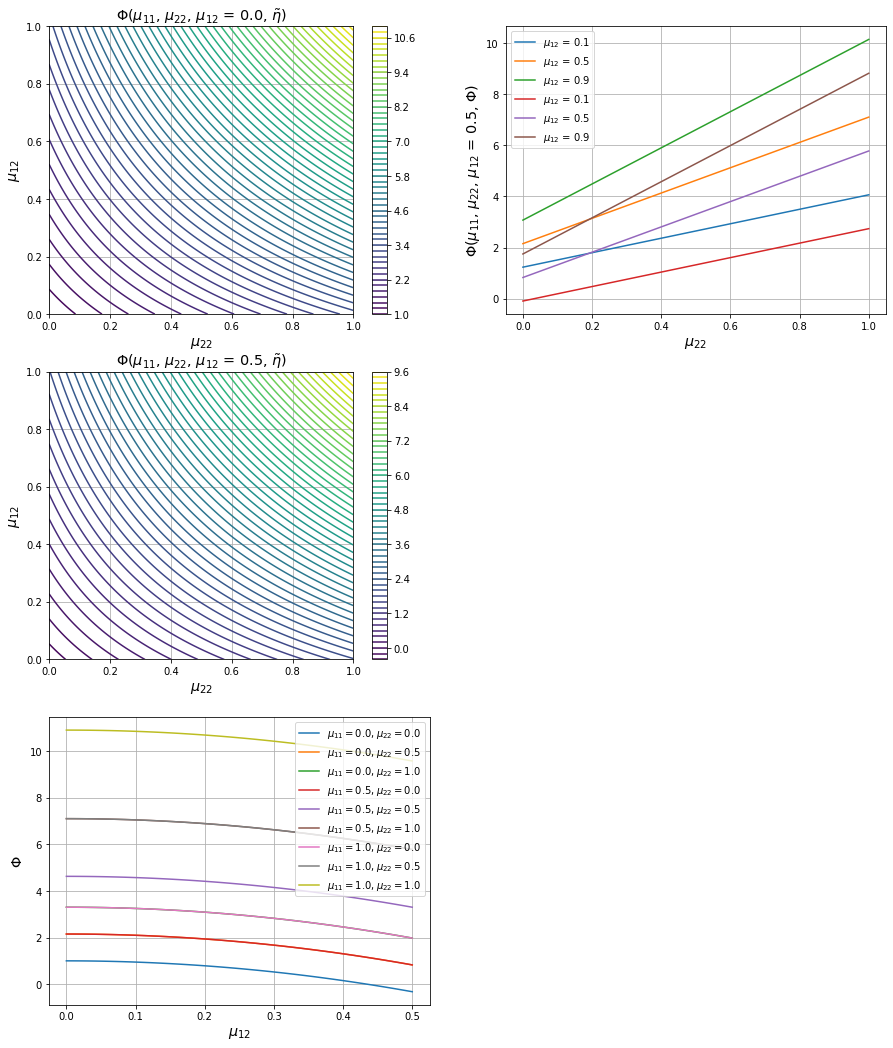

In [73]:
figrows = 3
figcols = 2

plt.figure(figsize=(15, 6 * figrows))

plt.subplot(figrows, figcols, 1)
temp1 = 0.0
plt.contour(mu11mu22[0], mu11mu22[1],
            Phi(mu11mu22[0], mu11mu22[1], temp1, etaTilde), 50)
plt.title(
    titleName(
        funcs[0],
        [variables[0], variables[1], [variables[2], temp1], variables[6]]))
plt.colorbar()
plt.xlabel(axisLabels[1])
plt.ylabel(axisLabels[2])

plt.subplot(figrows, figcols, 2)
temp2, temp3, temp4 = 0.1, 0.5, 0.9
plt.plot(mu11,
         Phi(mu11, temp2, temp1, etaTilde),
         label=titleName("x", [[variables[2], temp2]]))
plt.plot(mu11,
         Phi(mu11, temp3, temp1, etaTilde),
         label=titleName("x", [[variables[2], temp3]]))
plt.plot(mu11,
         Phi(mu11, temp4, temp1, etaTilde),
         label=titleName("x", [[variables[2], temp4]]))
plt.xlabel(variables[1])
plt.ylabel(
    titleName(
        funcs[0],
        [axisLabels[0], axisLabels[1], [axisLabels[2], temp1], axisLabels[6]]))
plt.legend()

plt.subplot(figrows, figcols, 3)
temp1 = 0.5
plt.contour(mu11mu22[0], mu11mu22[1],
            Phi(mu11mu22[0], mu11mu22[1], temp1, etaTilde), 50)
plt.title(
    titleName(
        funcs[0],
        [variables[0], variables[1], [variables[2], temp1], variables[6]]))
plt.colorbar()
plt.xlabel(axisLabels[1])
plt.ylabel(axisLabels[2])

plt.subplot(figrows, figcols, 2)
temp2, temp3, temp4 = 0.1, 0.5, 0.9
plt.plot(mu11,
         Phi(mu11, temp2, temp1, etaTilde),
         label=titleName("x", [[variables[2], temp2]]))
plt.plot(mu11,
         Phi(mu11, temp3, temp1, etaTilde),
         label=titleName("x", [[variables[2], temp3]]))
plt.plot(mu11,
         Phi(mu11, temp4, temp1, etaTilde),
         label=titleName("x", [[variables[2], temp4]]))
plt.xlabel(variables[1])
plt.ylabel(
    titleName(
        funcs[0],
        [axisLabels[0], axisLabels[1], [axisLabels[2], temp1], axisLabels[6]]))
plt.legend()

plt.subplot(figrows, figcols, 5)
plt.plot(mu12,
         Phi(0.0, 0.0, mu12, etaTilde),
         label=r"$ \mu_{11}=0.0, \mu_{22}=0.0 $")
plt.plot(mu12,
         Phi(0.0, 0.5, mu12, etaTilde),
         label=r"$ \mu_{11}=0.0, \mu_{22}=0.5 $")
plt.plot(mu12,
         Phi(0.0, 1.0, mu12, etaTilde),
         label=r"$ \mu_{11}=0.0, \mu_{22}=1.0 $")
plt.plot(mu12,
         Phi(0.5, 0.0, mu12, etaTilde),
         label=r"$ \mu_{11}=0.5, \mu_{22}=0.0 $")
plt.plot(mu12,
         Phi(0.5, 0.5, mu12, etaTilde),
         label=r"$ \mu_{11}=0.5, \mu_{22}=0.5 $")
plt.plot(mu12,
         Phi(0.5, 1.0, mu12, etaTilde),
         label=r"$ \mu_{11}=0.5, \mu_{22}=1.0 $")
plt.plot(mu12,
         Phi(1.0, 0.0, mu12, etaTilde),
         label=r"$ \mu_{11}=1.0, \mu_{22}=0.0 $")
plt.plot(mu12,
         Phi(1.0, 0.5, mu12, etaTilde),
         label=r"$ \mu_{11}=1.0, \mu_{22}=0.5 $")
plt.plot(mu12,
         Phi(1.0, 1.0, mu12, etaTilde),
         label=r"$ \mu_{11}=1.0, \mu_{22}=1.0 $")
plt.xlabel(r"$ \mu_{12} $")
plt.ylabel(r"$ \Phi $")
plt.legend()

plt.show()

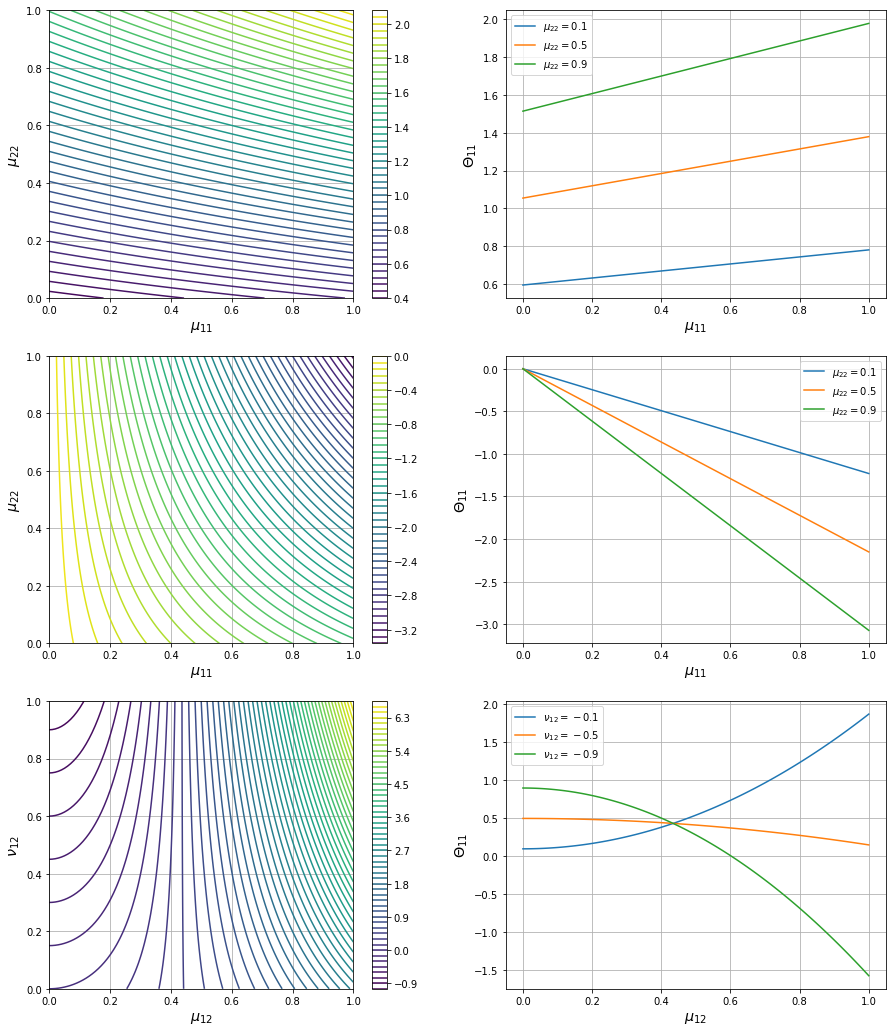

In [10]:
figrows = 3
figcols = 2

plt.figure(figsize=(15, 6 * figrows))

plt.subplot(figrows, figcols, 1)
plt.contour(mu11mu22[0], mu11mu22[1],
            Theta11(mu11mu22[0], mu11mu22[1], 0.5, -0.5, etaTilde), 50)
plt.colorbar()
plt.xlabel(r"$ \mu_{11} $")
plt.ylabel(r"$ \mu_{22} $")

plt.subplot(figrows, figcols, 2)
plt.plot(mu11,
         Theta11(mu11, 0.1, 0.25, -0.5, etaTilde),
         label=r"$ \mu_{22}=0.1 $")
plt.plot(mu11,
         Theta11(mu11, 0.5, 0.25, -0.5, etaTilde),
         label=r"$ \mu_{22}=0.5 $")
plt.plot(mu11,
         Theta11(mu11, 0.9, 0.25, -0.5, etaTilde),
         label=r"$ \mu_{22}=0.9 $")
plt.xlabel(r"$ \mu_{11} $")
plt.ylabel(r"$ \Theta_{11} $")
plt.legend()

plt.subplot(figrows, figcols, 3)
plt.contour(mu11nu11[0], mu11nu11[1],
            Theta11(0.0, 0.0, mu11nu11[0], mu11nu11[1], etaTilde), 50)
plt.colorbar()
plt.xlabel(r"$ \mu_{12} $")
plt.ylabel(r"$ \nu_{12} $")

plt.subplot(figrows, figcols, 6)
plt.plot(mu11,
         Theta11(0.0, 0.0, mu11, -0.1, etaTilde),
         label=r"$ \nu_{12}=-0.1 $")
plt.plot(mu11,
         Theta11(0.0, 0.0, mu11, -0.5, etaTilde),
         label=r"$ \nu_{12}=-0.5 $")
plt.plot(mu11,
         Theta11(0.0, 0.0, mu11, -0.9, etaTilde),
         label=r"$ \nu_{12}=-0.9 $")
plt.xlabel(r"$ \mu_{12} $")
plt.ylabel(r"$ \Theta_{11} $")
plt.legend()

plt.show()